## 데이터명 : 지역별 신설법인 데이터

### 2018년 ~ 2020년 3개년 지역별 신설된 법인 데이터 

In [84]:
# 환경구축

import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.5f}'.format
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
#원본데이터

data = pd.read_excel("1.지역별 신설법인 데이터.xlsx")
data

,KEDCD,기업명,기업형태,업종코드_10차,업종코드_10차명,설립일자,성별,우편번호,시도,구군,법정동,위도,경도,자본금,연령대
0,2184375.00000,*우,주식회사,NaN,NaN,20180528,NaN,38211.00000,경북,경주시,외동읍,35.74113,129.32344,20000000.00000,20대
1,2391722.00000,***면화학,주식회사,C20499,그 외 기타 분류 안된 화학제품 제조업,20180123,남성,15619.00000,NaN,NaN,NaN,NaN,NaN,1046000000.00000,40대
2,2407385.00000,**나눔,조합,P85709,기타 교육지원 서비스업,20180131,남성,31101.00000,충남,천안시 서북구,두정동,36.83696,127.13875,NaN,20대
3,2416041.00000,***설산업,주식회사,C25112,구조용 금속 판제품 및 공작물 제조업,20180226,남성,17170.00000,경기,용인시 처인구,원삼면,37.13523,127.30793,100000000.00000,40대
4,2416939.00000,**** 스마트,기타법인,M71102,변리사업,20180320,남성,35240.00000,대전,서구,둔산동,36.35325,127.38708,NaN,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351599,NaN,*영,주식회사,C27309,기타 광학기기 제조업,20200915,NaN,22826.00000,인천,서구,가좌동,37.48451,126.68142,30000000.00000,30대
351600,NaN,***쇼핑,주식회사,I56111,한식 일반 음식점업,20200116,NaN,47710.00000,부산,동래구,온천동,35.21888,129.08415,100000000.00000,20대
351601,NaN,***리아,주식회사,G46800,상품 종합 도매업,20200102,남성,5340.00000,서울,강동구,천호동,37.53723,127.13196,11765824000.00000,40대
351602,NaN,***래너,주식회사,N75122,상용 인력 공급 및 인사관리 서비스업,20200113,여성,7333.00000,서울,영등포구,여의도동,37.52074,126.92923,100000000.00000,40대


* 데이터 확인

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351604 entries, 0 to 351603
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   KEDCD      350275 non-null  float64
 1   기업명        351604 non-null  object 
 2   기업형태       351521 non-null  object 
 3   업종코드_10차   351566 non-null  object 
 4   업종코드_10차명  351566 non-null  object 
 5   설립일자       351604 non-null  int64  
 6   성별         274865 non-null  object 
 7   우편번호       349828 non-null  float64
 8   시도         349037 non-null  object 
 9   구군         346800 non-null  object 
 10  법정동        349035 non-null  object 
 11  위도         348409 non-null  float64
 12  경도         348409 non-null  float64
 13  자본금        350775 non-null  float64
 14  연령대        351604 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 40.2+ MB


In [7]:
data.isnull().sum()

KEDCD         1329
기업명              0
기업형태            83
업종코드_10차        38
업종코드_10차명       38
설립일자             0
성별           76739
우편번호          1776
시도            2567
구군            4804
법정동           2569
위도            3195
경도            3195
자본금            829
연령대              0
dtype: int64

* 전처리 : 데이터 타입 변환

In [8]:
data['설립일자'] = data['설립일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y/%m/%d'))

## 지역별 청년인구 대비 신설법인 수(창업수)

* 지역별 20,30대 신설법인 수

* 연령대 20,30 추출

In [9]:
youth_data= data[(data['연령대']=='20대') | (data['연령대']=='30대')]
youth_data

,KEDCD,기업명,기업형태,업종코드_10차,업종코드_10차명,설립일자,성별,우편번호,시도,구군,법정동,위도,경도,자본금,연령대
0,2184375.00000,*우,주식회사,NaN,NaN,2018-05-28,NaN,38211.00000,경북,경주시,외동읍,35.74113,129.32344,20000000.00000,20대
2,2407385.00000,**나눔,조합,P85709,기타 교육지원 서비스업,2018-01-31,남성,31101.00000,충남,천안시 서북구,두정동,36.83696,127.13875,NaN,20대
10,2463207.00000,***로벌,주식회사,C22259,기타 플라스틱 발포 성형제품 제조업,2018-07-11,남성,59315.00000,전남,장흥군,장흥읍,34.69501,126.93805,180000000.00000,30대
15,2475316.00000,***어스,주식회사,J59113,광고 영화 및 비디오물 제작업,2018-07-24,여성,27469.00000,충북,충주시,대소원면,36.96982,127.87157,26000000.00000,30대
16,2487577.00000,**록,주식회사,J58222,응용 소프트웨어 개발 및 공급업,2018-08-31,남성,14056.00000,경기,안양시 동안구,관양동,37.39922,126.96809,50000000.00000,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351582,NaN,**환경,주식회사,M72919,"기타 기술 시험, 검사 및 분석업",2020-01-31,남성,16305.00000,경기,수원시 장안구,송죽동,37.30087,127.00770,30000000.00000,30대
351596,NaN,*****협동조합,조합,C13229,기타 직물제품 제조업,2020-05-07,여성,61087.00000,광주,북구,신용동,35.20667,126.86271,0.00000,30대
351599,NaN,*영,주식회사,C27309,기타 광학기기 제조업,2020-09-15,NaN,22826.00000,인천,서구,가좌동,37.48451,126.68142,30000000.00000,30대
351600,NaN,***쇼핑,주식회사,I56111,한식 일반 음식점업,2020-01-16,NaN,47710.00000,부산,동래구,온천동,35.21888,129.08415,100000000.00000,20대


In [10]:
youth_data.isnull().sum()

KEDCD          352
기업명              0
기업형태             8
업종코드_10차         6
업종코드_10차명        6
설립일자             0
성별           32419
우편번호           424
시도             604
구군            1201
법정동            604
위도             766
경도             766
자본금            246
연령대              0
dtype: int64

In [11]:
youth_data= youth_data.dropna(subset=['시도','연령대'],axis=0)
youth_data

,KEDCD,기업명,기업형태,업종코드_10차,업종코드_10차명,설립일자,성별,우편번호,시도,구군,법정동,위도,경도,자본금,연령대
0,2184375.00000,*우,주식회사,NaN,NaN,2018-05-28,NaN,38211.00000,경북,경주시,외동읍,35.74113,129.32344,20000000.00000,20대
2,2407385.00000,**나눔,조합,P85709,기타 교육지원 서비스업,2018-01-31,남성,31101.00000,충남,천안시 서북구,두정동,36.83696,127.13875,NaN,20대
10,2463207.00000,***로벌,주식회사,C22259,기타 플라스틱 발포 성형제품 제조업,2018-07-11,남성,59315.00000,전남,장흥군,장흥읍,34.69501,126.93805,180000000.00000,30대
15,2475316.00000,***어스,주식회사,J59113,광고 영화 및 비디오물 제작업,2018-07-24,여성,27469.00000,충북,충주시,대소원면,36.96982,127.87157,26000000.00000,30대
16,2487577.00000,**록,주식회사,J58222,응용 소프트웨어 개발 및 공급업,2018-08-31,남성,14056.00000,경기,안양시 동안구,관양동,37.39922,126.96809,50000000.00000,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351582,NaN,**환경,주식회사,M72919,"기타 기술 시험, 검사 및 분석업",2020-01-31,남성,16305.00000,경기,수원시 장안구,송죽동,37.30087,127.00770,30000000.00000,30대
351596,NaN,*****협동조합,조합,C13229,기타 직물제품 제조업,2020-05-07,여성,61087.00000,광주,북구,신용동,35.20667,126.86271,0.00000,30대
351599,NaN,*영,주식회사,C27309,기타 광학기기 제조업,2020-09-15,NaN,22826.00000,인천,서구,가좌동,37.48451,126.68142,30000000.00000,30대
351600,NaN,***쇼핑,주식회사,I56111,한식 일반 음식점업,2020-01-16,NaN,47710.00000,부산,동래구,온천동,35.21888,129.08415,100000000.00000,20대


In [12]:
#결측값 또는 이상치 없는 전국 시도 17개 확인

print(np.unique(youth_data['시도']))
print(len(np.unique(youth_data['시도'])))

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
17


In [13]:
# 설립일자별(2018, 2019, 2020) 데이터 나누기

youth_data_2018 = youth_data[youth_data['설립일자'].between('2018-01-01','2018-12-31')]
youth_data_2019 = youth_data[youth_data['설립일자'].between('2019-01-01','2019-12-31')]
youth_data_2020 = youth_data[youth_data['설립일자'].between('2020-01-01','2020-12-31')]

In [14]:
# 설립일자별 신설법인 개수 Series

youth_data_2018_df = pd.DataFrame(youth_data_2018.groupby(['시도']).size(),columns=['신설법인수'])
youth_data_2019_df = pd.DataFrame(youth_data_2019.groupby(['시도']).size(),columns=['신설법인수'])
youth_data_2020_df = pd.DataFrame(youth_data_2020.groupby(['시도']).size(),columns=['신설법인수'])

#### 시도_청년_총인구 : 행정구역(시군구)별/1세별 주민등록인구 // 출처- https://kosis.kr/index/index.do [국가통계포털]

In [15]:
youth_population = pd.read_csv('시도_청년_총인구.csv')

In [16]:
# 월 단위 column 삭제

youth_population= youth_population.drop(['2018. 01 월', '2018. 02 월',
       '2018. 03 월', '2018. 04 월', '2018. 05 월', '2018. 06 월', '2018. 07 월',
       '2018. 08 월', '2018. 09 월', '2018. 10 월', '2018. 11 월', '2018. 12 월',
       '2019. 01 월', '2019. 02 월', '2019. 03 월', '2019. 04 월', '2019. 05 월',
       '2019. 06 월', '2019. 07 월', '2019. 08 월', '2019. 09 월', '2019. 10 월',
       '2019. 11 월', '2019. 12 월', '2020. 01 월', '2020. 02 월', '2020. 03 월',
       '2020. 04 월', '2020. 05 월', '2020. 06 월', '2020. 07 월', '2020. 08 월',
       '2020. 09 월', '2020. 10 월', '2020. 11 월', '2020. 12 월'],axis=1)

In [17]:
youth_population = youth_population.sort_values('행정구역(시군구)별')
youth_population = youth_population[['행정구역(시군구)별','연령별','2018 년','2019 년','2020 년']]
youth_population

,행정구역(시군구)별,연령별,2018 년,2019 년,2020 년
9,강원도,20세~39세,358469,351771,346364
8,경기도,20세~39세,3698625,3696522,3715307
15,경상남도,20세~39세,835415,810243,777994
14,경상북도,20세~39세,619667,601357,575280
4,광주광역시,20세~39세,406163,400391,395242
2,대구광역시,20세~39세,648823,629627,615844
5,대전광역시,20세~39세,422995,413109,406576
1,부산광역시,20세~39세,899448,871859,850001
0,서울특별시,20세~39세,2998560,2966582,2935517
7,세종특별자치시,20세~39세,92412,97804,98945


In [18]:
#연도별 및 3개년 평균 청년 인구데이터 완성

youth_population['Total'] = round((youth_population['2018 년']+youth_population['2019 년']+youth_population['2020 년'])/3)
youth_population

,행정구역(시군구)별,연령별,2018 년,2019 년,2020 년,Total
9,강원도,20세~39세,358469,351771,346364,352201.00000
8,경기도,20세~39세,3698625,3696522,3715307,3703485.00000
15,경상남도,20세~39세,835415,810243,777994,807884.00000
14,경상북도,20세~39세,619667,601357,575280,598768.00000
4,광주광역시,20세~39세,406163,400391,395242,400599.00000
2,대구광역시,20세~39세,648823,629627,615844,631431.00000
5,대전광역시,20세~39세,422995,413109,406576,414227.00000
1,부산광역시,20세~39세,899448,871859,850001,873769.00000
0,서울특별시,20세~39세,2998560,2966582,2935517,2966886.00000
7,세종특별자치시,20세~39세,92412,97804,98945,96387.00000


In [20]:
youth_population.replace({'강원도':'강원',
                '경기도':'경기',
                '경상남도':'경남',
                '경상북도':'경북',
                '광주광역시':'광주',
                '대구광역시':'대구',
                '대전광역시' :'대전',
                '부산광역시' :'부산',
                '서울특별시':'서울',
                '세종특별자치시':'세종',
                '울산광역시':'울산',
                '인천광역시':'인천',
                '전라남도':'전남',
                '전라북도':'전북',
                '제주특별자치도':'제주',
                '충청남도':'충남',
                '충청북도':'충북'},inplace=True)
youth_population.set_index('행정구역(시군구)별',inplace=True)

In [21]:
youth_population

,연령별,2018 년,2019 년,2020 년,Total
행정구역(시군구)별,,,,,
강원,20세~39세,358469,351771,346364,352201.00000
경기,20세~39세,3698625,3696522,3715307,3703485.00000
경남,20세~39세,835415,810243,777994,807884.00000
경북,20세~39세,619667,601357,575280,598768.00000
광주,20세~39세,406163,400391,395242,400599.00000
대구,20세~39세,648823,629627,615844,631431.00000
대전,20세~39세,422995,413109,406576,414227.00000
부산,20세~39세,899448,871859,850001,873769.00000
서울,20세~39세,2998560,2966582,2935517,2966886.00000


<AxesSubplot:ylabel='youth'>

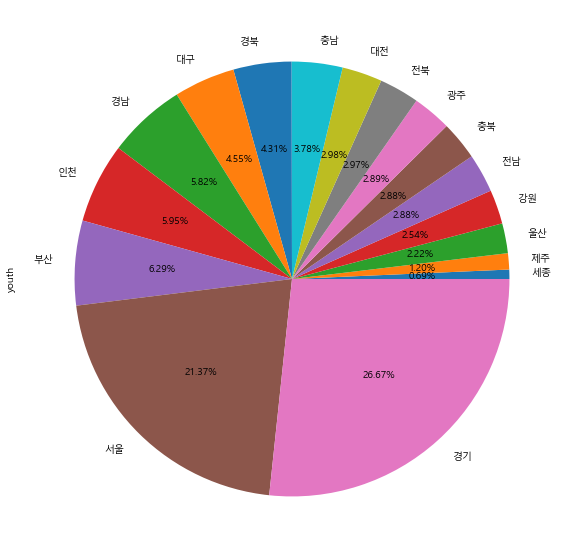

In [93]:
# 청년인구 지역별 비교

youth_population['Total'].sort_values().plot(kind='pie',figsize=(10,10),autopct=lambda p : '{:.2f}%'.format(p),ylabel='youth')

## 년도별 인구대비 신설법인 수 (2018,2019,2020)

In [22]:
#2018년

youth_data_2018_df['청년인구'] = youth_population['2018 년']
youth_data_2018_df
youth_data_2018_df['인구대비신설법인수'] = youth_data_2018_df['신설법인수']/ youth_data_2018_df['청년인구']
youth_data_2018_df.sort_values('인구대비신설법인수',ascending=False,inplace=True)
youth_data_2018_df

,신설법인수,청년인구,인구대비신설법인수
시도,,,
서울,11463,2998560,0.00382
광주,1146,406163,0.00282
전남,931,411745,0.00226
제주,382,169441,0.00225
경기,7153,3698625,0.00193
세종,176,92412,0.00190
대전,772,422995,0.00183
전북,754,425428,0.00177
충남,889,537386,0.00165


In [23]:
#2019

youth_data_2019_df['청년인구'] = youth_population['2018 년']
youth_data_2019_df
youth_data_2019_df['인구대비신설법인수'] = youth_data_2019_df['신설법인수']/ youth_data_2019_df['청년인구']
youth_data_2019_df.sort_values('인구대비신설법인수',ascending=False,inplace=True)
youth_data_2019_df

,신설법인수,청년인구,인구대비신설법인수
시도,,,
서울,11970,2998560,0.00399
광주,1114,406163,0.00274
경기,8498,3698625,0.00230
제주,380,169441,0.00224
세종,204,92412,0.00221
전남,862,411745,0.00209
전북,882,425428,0.00207
인천,1543,843463,0.00183
대전,750,422995,0.00177


In [24]:
#2020

youth_data_2020_df['청년인구'] = youth_population['2018 년']
youth_data_2020_df
youth_data_2020_df['인구대비신설법인수'] = youth_data_2020_df['신설법인수']/ youth_data_2020_df['청년인구']
youth_data_2020_df.sort_values('인구대비신설법인수',ascending=False,inplace=True)
youth_data_2020_df

,신설법인수,청년인구,인구대비신설법인수
시도,,,
서울,12277,2998560,0.00409
광주,1141,406163,0.00281
경기,10260,3698625,0.00277
전북,1028,425428,0.00242
세종,217,92412,0.00235
제주,386,169441,0.00228
충남,1203,537386,0.00224
전남,887,411745,0.00215
대전,892,422995,0.00211


In [80]:
#3개년 총합 순위


youth_data_2018_df = pd.DataFrame(youth_data_2018.groupby(['시도']).size(),columns=['신설법인수'])
youth_data_2019_df = pd.DataFrame(youth_data_2019.groupby(['시도']).size(),columns=['신설법인수'])
youth_data_2020_df = pd.DataFrame(youth_data_2020.groupby(['시도']).size(),columns=['신설법인수'])

youth_data_total_df = pd.concat([youth_data_2018_df,youth_data_2019_df,youth_data_2020_df],axis=1)
youth_data_total_df.columns=['2018','2019','2020']
youth_data_total_df['Total']= (youth_data_total_df['2018']+youth_data_total_df['2019']+youth_data_total_df['2020'])/3
youth_data_total_df

,2018,2019,2020,Total
시도,,,,
강원,541,507,650,566.00000
경기,7153,8498,10260,8637.00000
경남,959,1003,1104,1022.00000
경북,988,955,1008,983.66667
광주,1146,1114,1141,1133.66667
대구,909,975,1030,971.33333
대전,772,750,892,804.66667
부산,1445,1554,1781,1593.33333
서울,11463,11970,12277,11903.33333


In [81]:
print(youth_total.index)

print(youth_population['Total'].index)

youth_total_df = pd.concat([youth_data_total_df['Total'],youth_population['Total']],axis=1)
youth_total_df.columns=['신설법인수','청년인구']
youth_total_df['인구대비신설법인수'] = youth_total_df['신설법인수']/ youth_total_df['청년인구']
youth_total_df.sort_values('인구대비신설법인수',ascending=False,inplace=True)
youth_total_df

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='시도')
Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='행정구역(시군구)별')


,신설법인수,청년인구,인구대비신설법인수
서울,11903.33333,2966886.00000,0.00401
광주,1133.66667,400599.00000,0.00283
경기,8637.00000,3703485.00000,0.00233
제주,382.66667,167242.00000,0.00229
전남,893.33333,399617.00000,0.00224
전북,888.00000,412583.00000,0.00215
세종,199.00000,96387.00000,0.00206
대전,804.66667,414227.00000,0.00194
충남,1013.33333,524725.00000,0.00193
인천,1560.33333,826651.00000,0.00189


=========현지 PC에서 지도 그리기===========

In [94]:
#지역별 신설법인 위치 (위도, 경도) >> qgis 캡쳐본으로 마무리

# 신설법인 창업자 연령대 비중 (지역별)

In [95]:
data.head()

,KEDCD,기업명,기업형태,업종코드_10차,업종코드_10차명,설립일자,성별,우편번호,시도,구군,법정동,위도,경도,자본금,연령대
0,2184375.00000,*우,주식회사,NaN,NaN,2018-05-28,NaN,38211.00000,경북,경주시,외동읍,35.74113,129.32344,20000000.00000,20대
1,2391722.00000,***면화학,주식회사,C20499,그 외 기타 분류 안된 화학제품 제조업,2018-01-23,남성,15619.00000,NaN,NaN,NaN,NaN,NaN,1046000000.00000,40대
2,2407385.00000,**나눔,조합,P85709,기타 교육지원 서비스업,2018-01-31,남성,31101.00000,충남,천안시 서북구,두정동,36.83696,127.13875,NaN,20대
3,2416041.00000,***설산업,주식회사,C25112,구조용 금속 판제품 및 공작물 제조업,2018-02-26,남성,17170.00000,경기,용인시 처인구,원삼면,37.13523,127.30793,100000000.00000,40대
4,2416939.00000,**** 스마트,기타법인,M71102,변리사업,2018-03-20,남성,35240.00000,대전,서구,둔산동,36.35325,127.38708,NaN,40대


In [98]:
data['연령대'].isnull().sum()

0

In [102]:
np.unique(data['연령대'])

array(['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '90대이상', '정보없음'], dtype=object)

In [105]:
age_group = data.groupby('연령대')
age_group.size()

연령대
10대          95
20대       25462
30대       75880
40대      118227
50대       90413
60대       33683
70대        5790
80대         666
90대         184
90대이상       665
정보없음        539
dtype: int64

<AxesSubplot:ylabel='age'>

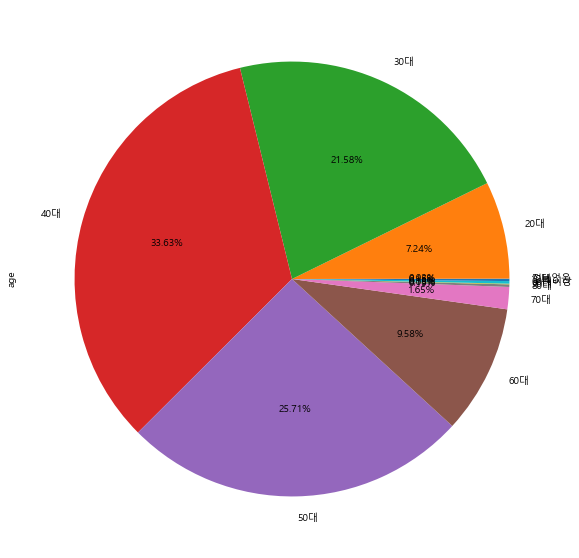

In [109]:
age_group.size().plot(kind='pie',figsize=(10,10),autopct=lambda p : '{:.2f}%'.format(p),ylabel='age')